<a href="https://colab.research.google.com/github/sagnik765/Malaria-Infection-Detection/blob/main/Malaria_Infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import pickle as pk
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, AveragePooling2D, Dropout, Flatten, Activation, MaxPool2D
from PIL import Image
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tqdm
from PIL import Image
import tensorflow as tf
from keras.optimizers import adam_v2
from tensorflow import keras
from sklearn.metrics import classification_report

## Data Loader

In [ ]:
X = np.load('/content/drive/MyDrive/NUS/Dataset/Arrays/Img.npy')
Y = np.load('/content/drive/MyDrive/NUS/Dataset/Arrays/Label.npy')

In [ ]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42, shuffle = True)

## Data Processing

In [ ]:
path1 = '/content/drive/MyDrive/NUS/Dataset/cell_images/Parasitized'
a = os.listdir(path1)

In [ ]:
path2 = '/content/drive/MyDrive/NUS/Dataset/cell_images/Uninfected'
b = os.listdir(path2)

In [ ]:
path = '/content/drive/MyDrive/NUS/Dataset/cell_images/Parasitized'
img_list = []
for i in range(0, len(a)):
    path1 = path + "/" + a[i]
    img = cv2.imread(path1)
    try:
        img_small = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    except:
        print(a[i])
        continue
    if img_small.shape == (128,128,3):
        img_list.append(img_small)
    else:
        continue

Thumbs.db


In [ ]:
n1 = np.asarray(img_list)
p = np.zeros((n1.shape[0], 1))

In [ ]:
np.save('/content/drive/MyDrive/NUS/Dataset/Arrays/P_img.npy', n1)
np.save('/content/drive/MyDrive/NUS/Dataset/Arrays/P_L.npy', p)

In [ ]:
a = np.load('/content/drive/MyDrive/NUS/Dataset/Arrays/UI_L.npy')

In [ ]:
b = np.load('/content/drive/MyDrive/NUS/Dataset/Arrays/P_L.npy')

In [ ]:
c = np.concatenate((a, b), axis = 0)
np.save('/content/drive/MyDrive/NUS/Dataset/Arrays/Label.npy', c)

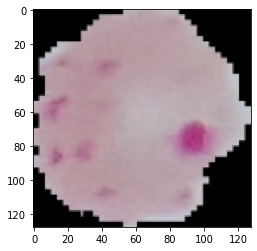

In [ ]:
plt.imshow(c[20000])

In [ ]:
c = np.concatenate((a,b), axis = 0)

In [ ]:
np.save('/content/drive/MyDrive/NUS/Dataset/Arrays/Label.npy', c)

# Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)      

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.000001)
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10 , shuffle= True, batch_size= 32, validation_split = 0.1 )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


621/621 [==============================] - 12s 18ms/step - loss: 0.9634 - accuracy: 0.8492 - val_loss: 0.1916 - val_accuracy: 0.9438
Epoch 2/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1579 - accuracy: 0.9488 - val_loss: 0.1678 - val_accuracy: 0.9420
Epoch 3/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1314 - accuracy: 0.9572 - val_loss: 0.1679 - val_accuracy: 0.9388
Epoch 4/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1242 - accuracy: 0.9580 - val_loss: 0.1727 - val_accuracy: 0.9510
Epoch 5/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1081 - accuracy: 0.9628 - val_loss: 0.1558 - val_accuracy: 0.9492
Epoch 6/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1030 - accuracy: 0.9632 - val_loss: 0.1923 - val_accuracy: 0.9293
Epoch 7/10
621/621 [==============================] - 11s 18ms/step - loss: 0.1052 - accuracy: 0.9643 - val_loss: 0.1827 - val_accuracy: 0.9470
Epo

## Testing

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred1 = []
for i in range(0, pred.shape[0]):
    a = pred[i]
    if a[0] > a[1]:
        pred1.append(0)
    if a[0] < a[1]:
        pred1.append(1)
pred1 = np.asarray(pred1)
pred1 = pred1.reshape(pred1.shape[0], 1)

In [ ]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      2800
         1.0       0.96      0.94      0.95      2714

    accuracy                           0.95      5514
   macro avg       0.95      0.95      0.95      5514
weighted avg       0.95      0.95      0.95      5514

